<a href="https://colab.research.google.com/github/GauravDawra/MellowD/blob/main/ANN_Genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import librosa
import os
import matplotlib.pyplot as plt

In [ ]:
# mounting the google drive
from google.colab import drive
drive.mount('/gd')

Mounted at /gd


In [ ]:
hashing = {}
hash = 0
X, y = [], []
mfcc1 = [0]*10

#Taking the input from the genres files
for root, dirs, files in os.walk("/gd/MyDrive/MellowD/genres", topdown=False):
  for name in dirs:
    if name[-8:] != "mel_data" and root[-8:] != "mel_data":
      if name not in hashing:
        hashing[name] = hash
        hash += 1
      for root1, dirs1, files1 in os.walk(os.path.join(root, name), topdown=False):
        # y.append(hashing[name])
        for name1 in files1:
          signal, sr = librosa.load(os.path.join(root1, name1), sr=22050)

          for d in range(10):
            st = 66150*d
            ed = st + 66150
            mfcc = librosa.feature.mfcc(signal[st:ed], sr, n_mfcc=13, n_fft=2048, hop_length=512).T

            if len(mfcc) == np.ceil(66150/512):
              mfcc1[hashing[name]] = mfcc.tolist()
              X.append(mfcc.tolist())
              y.append(hashing[name])

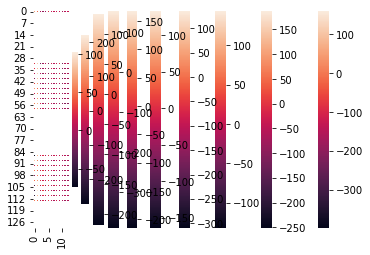

In [ ]:
# plotting the heatmap for mfcc matrix
import seaborn as sns
for (i, x) in enumerate(mfcc1):
  sns.heatmap(x, linewidth=0.5)
  plt.savefig(str(i))

In [ ]:
mx, mn = -1e18, 1e18
for i in range(len(X)):
  X[i] = np.array(X[i]).flatten()
  mx = max(mx, np.max(X[i]))
  mn = min(mn, np.min(X[i]))
X, y = np.array(X), np.array(y)

In [ ]:
#Splitting the data into X_train,y_train,X_test,y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Implementing the Multi layer perceptron classifier
from sklearn.neural_network import MLPClassifier
sklearn_nn = MLPClassifier(hidden_layer_sizes=(512, 256, 64, 32),verbose=False,activation='tanh',
                             solver="sgd", batch_size=64, learning_rate_init=0.08, max_iter=1000, random_state=42)
# fitting the model on training data
sklearn_nn.fit(X_train, y_train)

#Predicting the accuracy of the model on testing data
print("Accuracy = ", sklearn_nn.score(X_test, y_test)*100, "%")

Accuracy =  8.3 %
